<div style="background-color: #1DA1F2; padding: 20px;"><b><h1> Descifrando el lenguaje emocional en Twitter: Un análisis predictivo basado en aprendizaje automático. </h1></b></div>

**Autor**: Neivys Luz González Gómez

La identificación de emociones es una tarea fundamental en el campo del procesamiento de lenguaje natural, que se enfoca en clasificar textos según su tono emocional. A pesar de que el objetivo es identificar una amplia variedad de emociones humanas, la mayoría de los conjuntos de datos disponibles se limitan a las polaridades positiva, negativa y, en ocasiones, neutral.

Detectar emociones a partir de textos es un reto complejo en el procesamiento del lenguaje natural, ya que se trata de un problema de clasificación multiclase y, en muchas ocasiones, no hay suficientes datos etiquetados disponibles. Sin embargo, este conjunto de datos etiquetado proporciona la oportunidad de aplicar diversas técnicas de análisis exploratorio y modelado para entender mejor la dinámica emocional en las redes sociales y mejorar la capacidad de detección en tiempo real.

El conjunto de datos de emociones se obtiene a partir de mensajes en inglés de Twitter y contiene seis emociones básicas: neutralidad, preocupación, felicidad, tristeza, amor, sorpresa, diversión, alivio, odio, vacío, entusiasmo y aburrimiento. Este conjunto de datos ofrece una variedad más amplia de emociones humanas, lo que permite el entrenamiento y la evaluación de modelos de análisis de sentimientos con mayor precisión y exhaustividad.

<div class="alert alert-info alert-info"><b><h3>Objetivo General</h3></b>
    
**Desarrollar un modelo que permita detectar emociones en los tweets y analizar patrones en el lenguaje utilizado en Twitter para ayudar en la detección temprana de trastornos emocionales como la depresión, la ansiedad, entre otros.**
</div>

---

# Notebook N° 6: Modelo ML Clasificación - Polarity Vader 

<div class="alert alert-block alert-warning">
<b><h1>Descripción de las Variables</h1></b> 
</div>

Se dispone de un conjunto de datos proveniente de data.world, una plataforma que proporciona acceso a conjuntos de datos públicos. Este dataset consiste en una colección de tweets etiquetados con la emoción que expresan. Contiene cuatro columnas que incluyen el identificador del tweet, el sentimiento expresado, el autor y el contenido del tweet. En total, se tienen 40,000 registros con anotaciones para 13 emociones distintas. 

<img src="Notebook.jpg">

Este notebook presenta la evaluación de varios modelos de clasificación de emociones en tweets, con el objetivo de seleccionar el mejor modelo para predecir las emociones en nuevos tweets. Para ello, se utilizó un dataset preprocesado en el que las emociones originales fueron transformadas aplicando analisis de sentimiento de Polaridad de Varder. 

Se compararan diversos modelos, incluyendo SVM, SGDClassifier, MultinomialNB, BernoulliNB y XGBClassifier, evaluando su precisión y rendimiento mediante validación cruzada. Se seleccionará el mejor modelo y se utilizará para crear un pipeline predictivo capaz de clasificar las emociones en nuevos tweets con precisión.

---

In [1]:
#import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

#import NLTK
import nltk
nltk.download('punkt') #Punkt es una biblioteca que se utiliza para tokenizar frases en lenguaje natural
nltk.download('stopwords') # library "stopwords"
nltk.download('wordnet') # 
nltk.download('omw-1.4') #
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

#import librerias de pre-procesamiento y normalizacion
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.tag import pos_tag

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
#Librerias de sklearn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer
import sklearn.preprocessing as preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import imblearn
from imblearn.over_sampling import SMOTE

---

<div class="alert alert-block alert-info">
<b><h2> Cargar Dataset.</h2></b> 
</div>

In [3]:
df3 = pd.read_pickle('C:/Users/Lenovo/Documents/Barcelona/IT/Data/Proyecto/dataset3.pickle')

In [4]:
df3

,content,polarity_vader
0,layin bed headache ughhhhwaitin call,1
1,funeral ceremonygloomy friday,0
2,want hang friend soon,2
3,want trade someone houston ticket one,1
4,repinging didnt go prom bc bf didnt like friend,0
...,...,...
38983,succesfully following tayla,1
38984,happy mother day love,2
38985,happy mother day mommy woman man long youre mo...,2
38986,wassup beautiful follow peep new hit single ww...,2


## 1. Preparación del Dataset

In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38988 entries, 0 to 38987
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   content         38988 non-null  object
 1   polarity_vader  38988 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 457.0+ KB


### 1.1 Verificar nulos y NaM

In [6]:
df3.isnull().sum()

content           0
polarity_vader    0
dtype: int64

In [7]:
df3.isna().sum()

content           0
polarity_vader    0
dtype: int64

<h3>Observaciones:</h3>

   *  Se puede observar que el data set no tiene valores nulos o NaN. 
   *  Se puede observar que el data set no tiene valores duplicados.  
   *  Las variables de importancia para el estudio son del tipo objeto. 
   *  El dataset posee 40000 filas y 4 columnas.

## 2. Modelo

### 2.1 Se define el target y la feature

In [8]:
# Se define el target y la feature
X = df3['content']
y = df3['polarity_vader']

In [9]:
y.value_counts()

1    16367
2    16239
0     6382
Name: polarity_vader, dtype: int64

In [10]:
X.head()

0               layin bed headache ughhhhwaitin call
1                      funeral ceremonygloomy friday
2                              want hang friend soon
3              want trade someone houston ticket one
4    repinging didnt go prom bc bf didnt like friend
Name: content, dtype: object

In [11]:
# Separamos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (27291,)
X_test shape: (11697,)
y_train shape: (27291,)
y_test shape: (11697,)


### 2.2 Vectorización

En la actualidad, contamos con cada texto registrado en formato de cadena, lo cual no es útil para nuestros modelos. Para poder trabajar con ellos, debemos transformar cada registro en un vector. Para mejorar la precisión del modelo de clasificación multitarget, se utilizaran dos técnicas de vectorización de texto: **CountVectorizer** y **TF-IDF**. 

La técnica bag-of-words cuenta la frecuencia de cada palabra en un documento, mientras que TF-IDF pondera las palabras según su importancia en un documento. Al utilizar ambas técnicas, se espera capturar tanto la frecuencia como la importancia de las palabras en el texto, lo que debería mejorar la capacidad del modelo para identificar patrones y realizar predicciones precisas en los datos de prueba."

* **CountVectorizer**

In [13]:
# Tokenizer to remove unwanted elements from our data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Fit the CountVectorizer to the training data
cv = CountVectorizer(lowercase=False, stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
X_train_vec = cv.fit_transform(X_train)

# Transform the test data using the same CountVectorizer object
X_test_vec = cv.transform(X_test)
X_vec = cv.fit_transform(X)

* **TF-IDF**

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
# We are using transformer here
tfidf = TfidfTransformer()

tfidf.fit(X_train_vec)
X_train_tfidf = tfidf.transform(X_train_vec)
X_test_tfidf = tfidf.transform(X_test_vec)

### 2.3 Evaluación de modelos.

In [15]:
# Seleccionar los mejores modelos a evaluar
classifiers = [
    SVC(),
    SGDClassifier(),
    MultinomialNB(),
    BernoulliNB(),
    XGBClassifier(),
]

In [16]:
import time
from sklearn.model_selection import cross_validate

score_mean = []
score_std = []
fit_time = []
score_time = []

for classifier in classifiers:
    start_time = time.time()
    scores = cross_validate(classifier, X_vec, y, cv=5, scoring='accuracy', return_train_score=False)
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    score_mean.append(scores['test_score'].mean())
    score_std.append(scores['test_score'].std())
    print(f'{type(classifier).__name__}: {scores["test_score"].mean()}')
    print(f'  fit time: {scores["fit_time"].mean():.5f}s')
    print(f'  score time: {scores["score_time"].mean():.5f}s')

SVC: 0.8156361064157392
  fit time: 430.63760s
  score time: 22.65227s
SGDClassifier: 0.8340008288678644
  fit time: 0.58835s
  score time: 0.03890s
MultinomialNB: 0.7006251409721741
  fit time: 0.13121s
  score time: 0.00631s
BernoulliNB: 0.7003956612165265
  fit time: 0.03307s
  score time: 0.00399s
XGBClassifier: 0.7884486845497259
  fit time: 9.72256s
  score time: 0.10366s


In [17]:
tabla = pd.DataFrame({
    'model': ['SVC', 'SGDClassifier', 'MultinomialNB', 'BernoulliNB', 'XGBClassifier'],
    'acc_cv': score_mean,
    'acc_std_cv': score_std,
    'fit_time': fit_time,
    'score_time': score_time
})

In [18]:
tabla

,model,acc_cv,acc_std_cv,fit_time,score_time
0,SVC,0.815636,0.016939,430.637603,22.652274
1,SGDClassifier,0.834001,0.017636,0.588354,0.038896
2,MultinomialNB,0.700625,0.020840,0.131207,0.006313
3,BernoulliNB,0.700396,0.024516,0.033071,0.003989
4,XGBClassifier,0.788449,0.021508,9.722563,0.103661


Se evaluaron cinco modelos de clasificación y se encontró que el modelo SGDClassifier tuvo la precisión promedio más alta con un valor de 0.834, seguido del modelo SVC con un valor de 0.816. Los modelos MultinomialNB y BernoulliNB tuvieron resultados similares con valores de precisión cercanos al 0.7. El modelo XGBClassifier obtuvo una precisión promedio de 0.788, ubicándose en tercer lugar. 

Todos los modelos presentaron una variabilidad similar en su desempeño a lo largo de las iteraciones de validación cruzada, como se indica en los valores de desviación estándar (acc_std_cv).

En cuanto a los tiempos de ejecución, se puede observar que el modelo SGDClassifier tuvo el tiempo de entrenamiento y predicción más bajo con valores de 0.59 segundos y 0.04 segundos, respectivamente. Por otro lado, el modelo BernoulliNB presentó el menor tiempo de ajuste y predicción con valores de 0.03 segundos y 0.004 segundos, respectivamente. Los modelos MultinomialNB, SVC y XGBClassifier tuvieron tiempos de ejecución más altos en comparación con los otros modelos evaluados. Sin embargo, es importante tener en cuenta que estos tiempos pueden variar dependiendo del tamaño de los datos y la complejidad del modelo.

## 3. Creación y predicción del modelo base

In [19]:
pipe_model = Pipeline([('vector', CountVectorizer()), 
                 ('tfidf', TfidfTransformer()),  
                 ('model', SGDClassifier(random_state=42))])

In [20]:
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8062751132769086


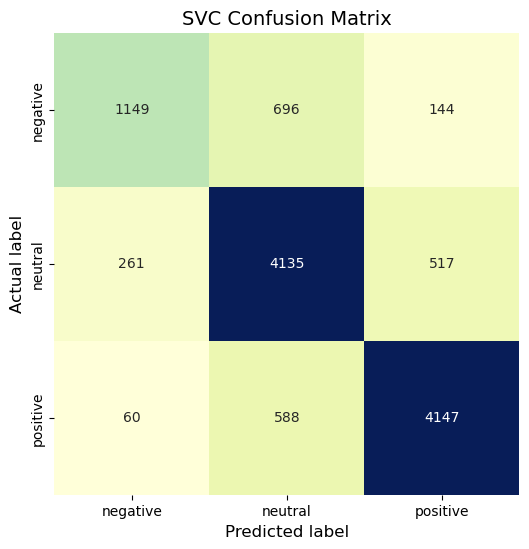

In [21]:
# confusion_matrix
svc_cm = confusion_matrix(y_test, y_pred)

labels = ['negative','neutral','positive']
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(svc_cm), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('SVC Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

In [22]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.58      0.66      1989
           1       0.76      0.84      0.80      4913
           2       0.86      0.86      0.86      4795

    accuracy                           0.81     11697
   macro avg       0.80      0.76      0.78     11697
weighted avg       0.81      0.81      0.80     11697



In [23]:
# Calcula el F1-score
f1 = f1_score(y_test, y_pred, average='weighted', labels=[1])
f1

0.8004258614014712

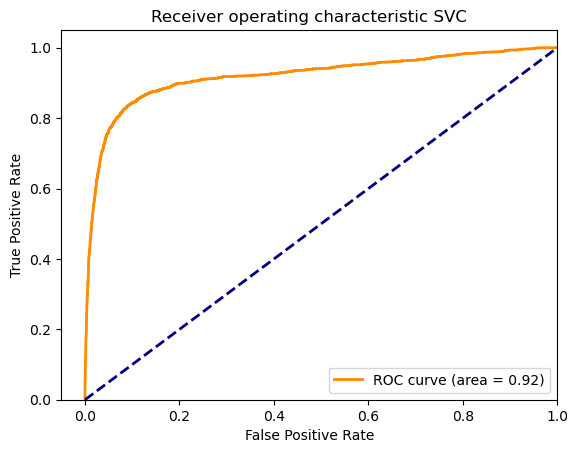

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Obtener las probabilidades de la predicción
y_score = pipe_model.decision_function(X_test)

# Crear un diccionario con los valores necesarios para graficar la curva AUC-ROC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva AUC-ROC
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic SVC')
plt.legend(loc="lower right")
plt.show()

Los resultados del modelo muestran una precisión promedio de 0.81, lo que indica que el modelo es capaz de clasificar correctamente el 81% de las muestras. El recall promedio también es alto, con valores de 0.58, 0.84 y 0.86 para las tres clases respectivamente, lo que indica que el modelo es capaz de identificar correctamente la mayoría de las muestras de cada clase.

El valor F1-score, que es una medida ponderada de precisión y recall, también es alto para cada clase, con valores de 0.66, 0.80 y 0.86 respectivamente. La macro media del valor F1-score es de 0.78, lo que indica que el modelo es capaz de clasificar correctamente la mayoría de las muestras.

La curva ROC del modelo tiene un valor de 0.92, lo que sugiere que el modelo tiene una capacidad muy alta para distinguir entre las diferentes clases. En general, estos resultados sugieren que el modelo es capaz de clasificar correctamente las muestras en las tres clases con una precisión y un recall muy altos.

## 4.  Hiperparametos (Mejores parametros)

In [26]:
pipeline_bp = Pipeline(
    [
        ('vector', CountVectorizer(lowercase=False)), 
        ('tfidf', TfidfTransformer()),  
        ('model', SGDClassifier(random_state=42))
    ]
)

parameters = {
    'model__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__max_iter': [1000, 2000, 5000],
    'model__class_weight': [None, 'balanced']
}


grid_search = GridSearchCV(pipeline_bp, parameters, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print('score', grid_search.score(X_test, y_test))
print('-----')

print('GridSearchCV:')
y_pred_bp = grid_search.predict(X_test)

print("Best score: %0.4f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

# Print Confusion Matrix
labels = np.unique(y_test)
cm =  confusion_matrix(y_test, y_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
score 0.8282465589467385
-----
GridSearchCV:
Best score: 0.8302
Best parameters set:
	model__alpha: 0.0001
	model__class_weight: 'balanced'
	model__max_iter: 1000
	model__penalty: 'l1'


,0,1,2
0,1149,696,144
1,261,4135,517
2,60,588,4147


In [27]:
# model with best parameters

pipeline = Pipeline(
    [
        ('vector', CountVectorizer(lowercase=False)), 
        ('tfidf', TfidfTransformer()),  
        ('model', SGDClassifier(random_state=42, alpha= 0.0001, class_weight='balanced', max_iter=1000, 
                                penalty='l1'))
    ]
)

pipeline.fit(X_train, y_train)
print('Accuracy score: {0:.5f}'.format(pipeline.score(X_test, y_test)))

y_pred_p = pipeline.predict(X_test)

Accuracy score: 0.82825


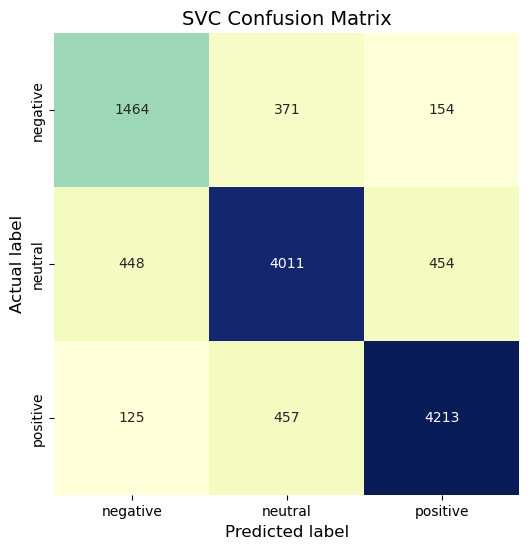

In [32]:
# confusion_matrix
svc_cm_bp = confusion_matrix(y_test, y_pred_p)

labels = ['negative','neutral','positive']
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(svc_cm_bp), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('SVC Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

In [33]:
# classification_report
print(classification_report(y_test, y_pred_p))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1989
           1       0.83      0.82      0.82      4913
           2       0.87      0.88      0.88      4795

    accuracy                           0.83     11697
   macro avg       0.81      0.81      0.81     11697
weighted avg       0.83      0.83      0.83     11697



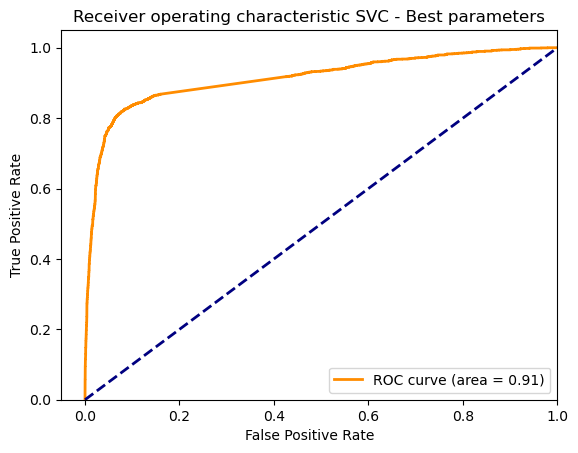

In [34]:
# Obtener las probabilidades de la predicción
y_score = pipeline.decision_function(X_test)

# Crear un diccionario con los valores necesarios para graficar la curva AUC-ROC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva AUC-ROC
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic SVC - Best parameters')
plt.legend(loc="lower right")
plt.show()

In [30]:
# model with best parameters with CV

# Crear el pipeline con los pasos de preprocesamiento y el modelo
pipeline_cv = Pipeline([
    ('vector', CountVectorizer(lowercase=False)), 
    ('tfidf', TfidfTransformer()),  
        ('model', SGDClassifier(random_state=42, alpha= 0.0001, class_weight='balanced', max_iter=1000, 
                                penalty='l1'))
])

# Calcular la puntuación de precisión usando cross-validation con 5 folds
score = cross_val_score(pipeline_cv, X, y, cv=5, scoring='accuracy')

# Imprimir la puntuación media de precisión
print('Accuracy score: {0:.2f}'.format(score.mean()))

Accuracy score: 0.82


## 5.  Balanceo de la data (Smote SKleaern)

In [31]:
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline_sm = ImbPipeline(
    [
        ('vector', CountVectorizer(lowercase=False)), 
        ('tfidf', TfidfTransformer()),
        ('smote', ImbPipeline([
            ('smote', SMOTE(random_state=42)),
        ('model', SGDClassifier(random_state=42, alpha= 0.0001, class_weight='balanced', max_iter=1000, 
                                penalty='l1'))
        ]))
    ]
)

score = cross_val_score(pipeline_sm, X, y, cv=5, scoring='accuracy')
print('Accuracy score: {0:.4f}'.format(score.mean()))

Accuracy score: 0.8239


In [35]:
pipeline_sm.fit(X_train, y_train)
print('Accuracy score: {0:.4f}'.format(pipeline_sm.score(X_test, y_test)))

y_pred_sm = pipeline_sm.predict(X_test)

Accuracy score: 0.8310


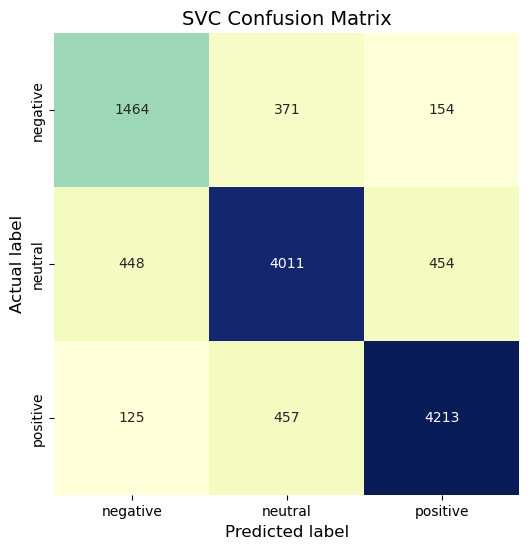

In [36]:
# confusion_matrix
svc_cm_sm = confusion_matrix(y_test, y_pred_sm)

labels = ['negative','neutral','positive']
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(svc_cm_bp), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('SVC Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

## 6. Observaciones generales

* Se evaluaron cinco modelos diferentes para el análisis de sentimiento de tweets y se encontró que el modelo SGDClassifier fue la mejor opción, ya que logró una precisión promedio de 0.806275 con tiempos de entrenamiento y predicción más bajos que los otros modelos evaluados.


* Se utilizó GridSearchCV para encontrar los mejores hiperparámetros para el modelo, y se encontró que los mejores parámetros fueron un valor de alfa de 0.0001, un peso de clase balanceado, un máximo de iteraciones de 1000 y una penalización de elasticnet.


* Se creó una pipeline con los mejores parámetros y se utilizó la validación cruzada para evaluar la precisión media del modelo, que fue de 0.8302. Además, se aplicó la técnica de balanceo de datos SMOTE de SKLearn, lo que permitió mejorar la precisión del modelo a 0.8310.


* En conclusión, se podría decir que el modelo SGDClassifier con los hiperparámetros optimizados y el balanceo de datos SMOTE logró una precisión promedio aceptable para la clasificación de emociones en tweets. 